# MNIST Digit Classification: Deep Learning Basics

In this notebook, we use TensorFlow and Keras to build a simple neural network to classify handwritten digits (0–9) from the MNIST dataset. We’ll start with a baseline feedforward model and then run a series of structured experiments to compare different configurations and techniques.

**Goals:**
- Understand forward pass, loss, backpropagation, and gradient descent
- Build and train a basic neural network using `Dense` layers
- Evaluate model performance on test data

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# set random seed for reproducibility
tf.random.set_seed(42)

Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


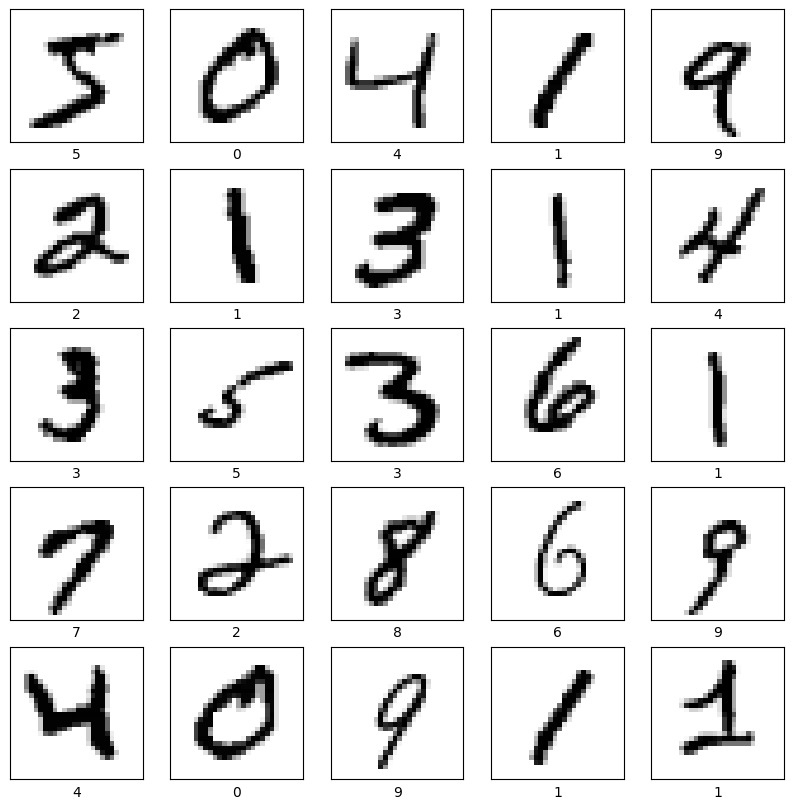

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8760 - loss: 0.4290
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9631 - loss: 0.1267
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9757 - loss: 0.0813
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9833 - loss: 0.0584
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9879 - loss: 0.0428
313/313 - 0s - 757us/step - accuracy: 0.9748 - loss: 0.0869

Test accuracy: 0.9747999906539917
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step


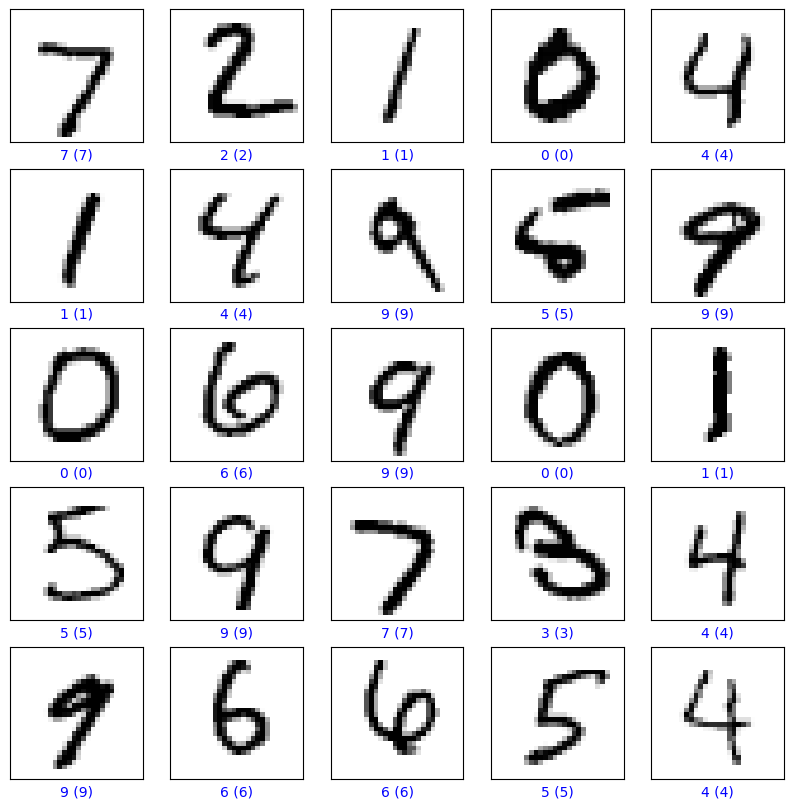

In [9]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print the shape of the dataset
print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

# Visualize some samples
plt.figure(figsize=(10, 10))
for i in range(25): 
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

# Normalize image pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build a simple feedforward neural network (Sequential model)
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)), # Converts 28x28 images to 784-dimensional vectors
    tf.keras.layers.Flatten(),  # Flatten the input - 
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer with ReLU
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9) and softmax activation
])

# Compile the model with an optimizer, loss function, and evaluation metric
# Adam - adaptive moment estimation optimizer that adjusts learning rates
# Sparse categorical crossentropy - suitable for multi-class classification with integer labels
# Accuracy - metric to evaluate the model's performance
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on training data
# epochs - number of times the model will see the entire training dataset
# verbose - controls the verbosity of the output during training (1 means progress bar)
# fit() - starts training loop:
# performs forward pass, computes loss, performs backpropagation, and updates weights with gradient descent
model.fit(X_train, y_train, epochs=5, verbose=1)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

# Make predictions on the test set
predictions = model.predict(X_test)

# Display some predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = tf.argmax(predictions[i]).numpy()  # Get the predicted label
    true_label = y_test[i]  # True label
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)
plt.show()

# Deep Learning Experiments on MNIST

This section contains a series of structured experiments to explore how different choices affect model performance. Each experiment is isolated and uses the same dataset for fair comparison.

### Experiment Variations Include:
- Different numbers of hidden layers and neurons
- Activation functions: ReLU, Sigmoid, Tanh, LeakyReLU
- Optimizers: Adam, SGD, RMSprop
- Regularization using Dropout
- Convolutional Neural Network (CNN)

Each experiment is timed and evaluated on test accuracy, test loss, and training duration. Results are summarized in a final comparison table.

In [10]:
# Load and normalize MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Split training into train/validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

# Store all experiment results
results = []

# Evaluation function
def run_experiment(model_fn, description, optimizer='adam', epochs=5):
    model = model_fn()

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    start = time.time()
    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=epochs,
        verbose=0  # Set to 1 for live output
    )
    end = time.time()

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    results.append({
        'Model': description,
        'Optimizer': optimizer,
        'Epochs': epochs,
        'Test Accuracy': round(test_acc, 4),
        'Test Loss': round(test_loss, 4),
        'Training Time (s)': round(end - start, 2)
    })


### 💡 MODELS ###

# 1. One Hidden Layer (64 units)
def model_one_hidden_64():
    return models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

# 2. Two Hidden Layers (128, 64)
def model_two_hidden_128_64():
    return models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

# 3. Sigmoid Activation
def model_sigmoid():
    return models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='sigmoid'),
        layers.Dense(10, activation='softmax')
    ])

# 4. Tanh Activation
def model_tanh():
    return models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='tanh'),
        layers.Dense(10, activation='softmax')
    ])

# 5. LeakyReLU Activation
def model_leaky_relu():
    return models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128),
        layers.LeakyReLU(alpha=0.1),
        layers.Dense(10, activation='softmax')
    ])

# 6. With Dropout Regularization
def model_with_dropout():
    return models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])

# 7. CNN (Convolutional Neural Network)
def model_cnn():
    return models.Sequential([
        layers.Reshape((28, 28, 1), input_shape=(28, 28)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

### RUN EXPERIMENTS ###

run_experiment(model_one_hidden_64, "1 Hidden Layer (64 units)", optimizer='adam')
run_experiment(model_two_hidden_128_64, "2 Hidden Layers (128, 64)", optimizer='adam')
run_experiment(model_sigmoid, "Sigmoid Activation", optimizer='adam')
run_experiment(model_tanh, "Tanh Activation", optimizer='adam')
run_experiment(model_leaky_relu, "LeakyReLU Activation", optimizer='adam')
run_experiment(model_with_dropout, "Dropout (30%)", optimizer='adam')
run_experiment(model_cnn, "Convolutional Neural Network", optimizer='adam')
run_experiment(model_one_hidden_64, "1 Hidden Layer (64 units) w/ SGD", optimizer='sgd')
run_experiment(model_two_hidden_128_64, "2 Hidden Layers (128,64) w/ RMSprop", optimizer='rmsprop')

### SHOW RESULTS ###

df = pd.DataFrame(results)
df = df.sort_values(by='Test Accuracy', ascending=False).reset_index(drop=True)
df


/Users/taha/data-science/python-fundamentals/venv/lib/python3.9/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/Users/taha/data-science/python-fundamentals/venv/lib/python3.9/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


,Model,Optimizer,Epochs,Test Accuracy,Test Loss,Training Time (s)
0,Convolutional Neural Network,adam,5,0.9874,0.0438,71.77
1,Dropout (30%),adam,5,0.9727,0.0901,14.56
2,"2 Hidden Layers (128, 64)",adam,5,0.9714,0.1078,12.63
3,"2 Hidden Layers (128,64) w/ RMSprop",rmsprop,5,0.9700,0.1142,13.42
4,Tanh Activation,adam,5,0.9697,0.0967,11.41
5,1 Hidden Layer (64 units),adam,5,0.9680,0.1075,7.95
6,Sigmoid Activation,adam,5,0.9671,0.1112,13.20
7,LeakyReLU Activation,adam,5,0.9665,0.1116,11.74
8,1 Hidden Layer (64 units) w/ SGD,sgd,5,0.9283,0.2459,6.87
